In [1]:
import sys

print (sys.version)

from tensorflow.python.client import device_lib

def get_available_devices():  
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())  

3.5.2 (default, Nov 17 2016, 17:05:23) 
[GCC 5.4.0 20160609]
['/cpu:0', '/gpu:0']


In [2]:
import numpy as np

import pandas as pd

pd.options.mode.chained_assignment = None

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline
# %matplotlib notebook

import matplotlib as mpl

import matplotlib.pyplot as plt

from pprint import pprint

In [3]:
# sample dataset (20K malicious URLs and 20K benign URLs)
# from https://github.com/albahnsen/ML_SecurityInformatics/blob/master/datasets/phishing.csv.zip

df = pd.read_csv('phishing.csv.gz', compression='gzip')

df.head(10)

,url,phishing
0,http://www.subalipack.com/contact/images/sampl...,1
1,http://fasc.maximecapellot-gypsyjazz-ensemble....,1
2,http://theotheragency.com/confirmer/confirmer-...,1
3,http://aaalandscaping.com/components/com_smart...,1
4,http://paypal.com.confirm-key-21107316126168.s...,1
5,http://lcthomasdeiriarte.edu.co/plugins/system...,1
6,http://livetoshare.org/open/service-apps.com.c...,1
7,http://www.i-m.co/reactivate/webupgrade/\n,1
8,http://manuelfernando.co/sparkatse/index.htm\n,1
9,http://www.bladesmithnews.com/confirmation-pay...,1


In [4]:
df.phishing.value_counts()

1    20000
0    20000
Name: phishing, dtype: int64

In [5]:
# remove line breaks
df['url2'] = df.url.str.rstrip()

pprint(df.url2[df.phishing == 1].sample(20, random_state=1).tolist())

['http://dothan.com.co/gold/austspark/index.htm',
 'http://78.142.63.63/%7Enetsysco/process/fc1d9c7ea4773b7ff90925c2902cb5f2',
 'http://verify95.5gbfree.com/coverme2010/',
 'http://www.racom.com/uploads/productscat/bookmark/ii.php?.rand=13vqcr8bp0gud&cbcxt=mai&email=abuse@tradinghouse.ca',
 'http://www.cleanenergytci.com/components/update.logon.l3an7lofamerica/2342343234532534546347677898765432876543345687656543876/',
 'http://209.148.89.163/-/santander.co.uk/weblegn/AccountLogin.php',
 'http://senevi.com/confirmation/',
 'http://www.hellenkeller.cl/tmp/new/noticias/Modulo_de_Atualizacao_Bradesco/index2.php?id=PSO1AM04L3Q6PSBNVJ82QUCO0L5GBSY2KM2U9BYUEO14HCRDVZEMTRB3DGJO9HPT4ROC4M8HA8LRJD5FCJ27AD0NTSC3A3VDUJQX6XFG519OED4RW6Y8J8VC19EAAAO5UF21CHGHIP7W4AO1GM8ZU4BUBQ6L2UQVARVM',
 'http://internet-sicherheit.co/de/konflikt/src%3Dde/AZ00276ZZ75/we%3Dhs_0_2/sicherheit/konto_verifizieren/verifizierung.php',
 'http://alen.co/docs/cleaner',
 'http://rattanhouse.co/Atualizacao_Bradesco/cadastro201

In [6]:
# find the maximum length of URLs

urls = list(df.url2)

max_len = 0

for url in urls:
  if (len(url) > max_len):
    max_len = len(url)

print('maximum length: %s '%max_len)

maximum length: 2080 


In [7]:
# calculate the average length of URLs

numChars = []

for url in urls:
  numChars.append(len(url))

print('average length: %s'%(sum(numChars) / len(numChars)))

average length: 92.717225


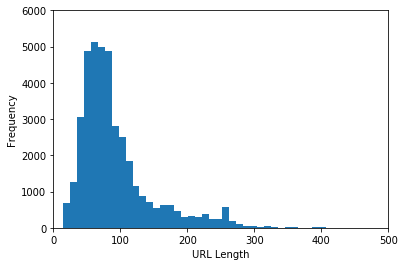

In [8]:
# draw length distribution diagram

plt.hist(numChars, 200)
plt.xlabel('URL Length')
plt.ylabel('Frequency')
plt.axis([0, 500, 0, 6000])
plt.show()

In [9]:
charsList = [list(url) for url in urls]

from collections import defaultdict

frequency = defaultdict(int)

for chars in charsList:
  for char in chars:
    frequency[char] += 1

print('totally %s characters found.'%(len(frequency)))

totally 98 characters found.


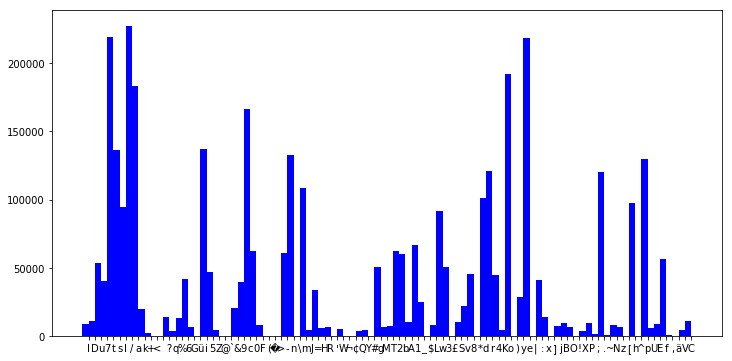

In [11]:
chars = frequency.keys()
freqs = frequency.values()

pos = np.arange(len(chars))
width = 1.0

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(chars)

plt.bar(pos, freqs, width, color='b')
# mpl.rcParams["figure.figsize"] = (12.0, 6.0)
plt.rcParams["figure.figsize"] = [12.0, 6.0]
plt.show()

In [12]:
# find rare character list

frequency2 = defaultdict(int)

for char, count in frequency.items():
  if (count < 5):
    frequency2[char] = count

print('totally %s characters with occurrence less than 5.'%(len(frequency2)))

for k, v in frequency2.items():
    print('%s : %s'%(k,v))

totally 6 characters with occurrence less than 5.
\ : 1
> : 1
ü : 1
¢ : 4
£ : 4
ä : 1


In [13]:
# convert character into index using index dictionary

dictionary = defaultdict(int)

id = 0

for char, count in frequency.items():
  dictionary[char] = id
  id += 1

corpus = [[dictionary[char] for char in chars] for chars in charsList]

In [14]:
Y = list(df.phishing)

from sklearn.model_selection import train_test_split

corpus_train, corpus_test, Y_train, Y_test = train_test_split(corpus, Y, test_size=0.2, random_state=42)

In [15]:
import pickle

pickle.dump(corpus_train, open( "corpus_train.pkl", "wb" ))
pickle.dump(corpus_test, open( "corpus_test.pkl", "wb" ))
pickle.dump(Y_train, open( "Y_train.pkl", "wb" ))
pickle.dump(Y_test, open( "Y_test.pkl", "wb" ))

In [2]:
# start from here during next runs, to skip data pre-processing steps

import pickle

corpus_train = pickle.load( open( "corpus_train.pkl", "rb" ) )
corpus_test = pickle.load( open( "corpus_test.pkl", "rb" ) )
Y_train = pickle.load( open( "Y_train.pkl", "rb" ) )
Y_test = pickle.load( open( "Y_test.pkl", "rb" ) )

In [15]:
import tensorflow as tf

import tflearn

# on g2.2xlarge (1 GPU, 8 vCPUs, 15 GiB memory)

tflearn.init_graph(num_cores=8, gpu_memory_fraction=0.8, soft_placement=True)

intra_op_parallelism_threads: 8
inter_op_parallelism_threads: 8
gpu_options {
  per_process_gpu_memory_fraction: 0.8
}
allow_soft_placement: true

In [16]:
from tflearn.data_utils import to_categorical, pad_sequences

trainX_ = pad_sequences(corpus_train, maxlen=200, value=98)
testX_ = pad_sequences(corpus_test, maxlen=200, value=98)

trainY_ = to_categorical(Y_train, nb_classes=2)
testY_ = to_categorical(Y_test, nb_classes=2)

trainX, trainY = tflearn.data_utils.shuffle(trainX_, trainY_)
testX, testY = tflearn.data_utils.shuffle(testX_, testY_)

In [17]:
from tflearn.layers.conv import conv_1d, global_max_pool
from tflearn.layers.merge_ops import merge

# comment it out at the first run
# tf.reset_default_graph()

net = tflearn.input_data(shape=[None, 200])

def build_network(network):
  network = tflearn.embedding(network, input_dim=99, output_dim=32)
  branch2 = conv_1d(network, 128, 2, padding='valid', activation='relu', regularizer="L2")
  branch3 = conv_1d(network, 128, 3, padding='valid', activation='relu', regularizer="L2")
  branch4 = conv_1d(network, 128, 4, padding='valid', activation='relu', regularizer="L2")
  branch5 = conv_1d(network, 128, 5, padding='valid', activation='relu', regularizer="L2")
  branch6 = conv_1d(network, 128, 6, padding='valid', activation='relu', regularizer="L2")
  network = merge([branch2, branch3, branch4, branch5, branch6], mode='concat', axis=1)
  network = tf.expand_dims(network, 2)
  network = global_max_pool(network)
  network = tflearn.dropout(network, 0.8)
  network = tflearn.fully_connected(network, 2, activation='softmax')
  network = tflearn.regression(network, optimizer='adam', learning_rate=0.001, loss='categorical_crossentropy')
  return network

# with tf.device('/gpu:0'):
#   with tf.contrib.framework.arg_scope([tflearn.variables.variable], device='/cpu:0'):
net = build_network(net)
    
# with tf.device('/cpu:0'):
model = tflearn.DNN(net, tensorboard_verbose=0)

In [18]:
accuracies_train = []
accuracies_test = []

for i in range(10):
#  with tf.device('/gpu:0'):
  model.fit(trainX, trainY, validation_set=(testX, testY), shuffle=True, show_metric=True, n_epoch=1, batch_size=32)
  model.save("cnn%s.tfl"%(i+1))
  accuracies_train.append(model.evaluate(trainX_, trainY_))
  accuracies_test.append(model.evaluate(testX_, testY_))

Training Step: 9999  | total loss: 0.04768 | time: 23.165s
| Adam | epoch: 010 | loss: 0.04768 - acc: 0.9896 -- iter: 31968/32000
Training Step: 10000  | total loss: 0.04348 | time: 25.352s
| Adam | epoch: 010 | loss: 0.04348 - acc: 0.9907 | val_loss: 0.02172 - val_acc: 0.9935 -- iter: 32000/32000
--
INFO:tensorflow:/home/ubuntu/phishing-urls/notebook/cnn10.tfl is not in all_model_checkpoint_paths. Manually adding it.


In [19]:
max_accuracy = 0.0
idx_at_max = 0

for idx, accuracy in enumerate(accuracies_test):
    print('At epoch %d, the accuracy of train data is %s, the accuracy of test data is %s'%((idx+1), accuracies_train[idx][0], accuracy[0]))
    if (accuracy[0] > max_accuracy):
        max_accuracy = accuracy[0]
        idx_at_max = idx

print('At epoch %d, the maximum accuracy of test data is %s'%((idx_at_max+1), max_accuracy))

At epoch 1, the accuracy of train data is 0.97990625, the accuracy of test data is 0.982
At epoch 2, the accuracy of train data is 0.98796875, the accuracy of test data is 0.9865
At epoch 3, the accuracy of train data is 0.99321875, the accuracy of test data is 0.990875
At epoch 4, the accuracy of train data is 0.9916875, the accuracy of test data is 0.989
At epoch 5, the accuracy of train data is 0.994375, the accuracy of test data is 0.992375
At epoch 6, the accuracy of train data is 0.9950625, the accuracy of test data is 0.9925
At epoch 7, the accuracy of train data is 0.993625, the accuracy of test data is 0.990875
At epoch 8, the accuracy of train data is 0.995875, the accuracy of test data is 0.993
At epoch 9, the accuracy of train data is 0.9966875, the accuracy of test data is 0.99325
At epoch 10, the accuracy of train data is 0.99665625, the accuracy of test data is 0.9935
At epoch 10, the maximum accuracy of test data is 0.9935


In [20]:
# load the model with the highest accuracy if the last one does not give the highest accuracy

model.load('cnn10.tfl')

INFO:tensorflow:Restoring parameters from /home/ubuntu/phishing-urls/notebook/cnn9.tfl


In [20]:
accuracy_train = model.evaluate(trainX_, trainY_)[0]

print('The accuracy of train data is %s'%('{percent:.2%}'.format(percent=accuracy_train)))

accuracy_test = model.evaluate(testX_, testY_)[0]

print('The accuracy of test data is %s'%('{percent:.2%}'.format(percent=accuracy_test)))

The accuracy of train data is 99.67%
The accuracy of test data is 99.35%


In [21]:
null_accuracy = max(testY_.mean(), (1 - testY_.mean()))

print('null accuracy is %s'%('{percent:.2%}'.format(percent= null_accuracy)))

null accuracy is 50.00%


In [22]:
import numpy as np

predict_labels = np.zeros(len(testX_))

batch_size = 100
batches = len(testX_) // batch_size

for i in range(batches):
    start = i * batch_size
    end = (i+1) * batch_size
    pred = model.predict_label(testX_[start:end])
    for j in range(batch_size):
        predict_labels[start + j] = pred[j][0]

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, predict_labels)

print('true negatives: %s'%cm[0,0])
print('false negatives: %s'%cm[1,0])
print('true positives: %s'%cm[1,1])
print('false positives: %s'%cm[0,1])

fpr = '{percent:.3%}'.format(percent= cm[0,1] / (cm[1,1] + cm[0,1]))
fnr = '{percent:.3%}'.format(percent= cm[1,0] / (cm[0,0] + cm[1,0]))
                             
print('false postive rate: %s'%fpr)
print('false negative rate: %s'%fnr)

true negatives: 3971
false negatives: 37
true positives: 3977
false positives: 15
false postive rate: 0.376%
false negative rate: 0.923%


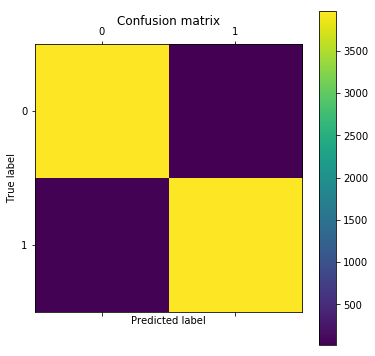

In [24]:
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [25]:
from sklearn.metrics import precision_score

print('precision score: %s'%precision_score(Y_test, predict_labels))


from sklearn.metrics import recall_score

print('recall score: %s'%recall_score(Y_test, predict_labels))


from sklearn.metrics import f1_score

print('f1 score: %s'%f1_score(Y_test, predict_labels))

precision score: 0.99624248497
recall score: 0.990782262083
f1 score: 0.993504871346


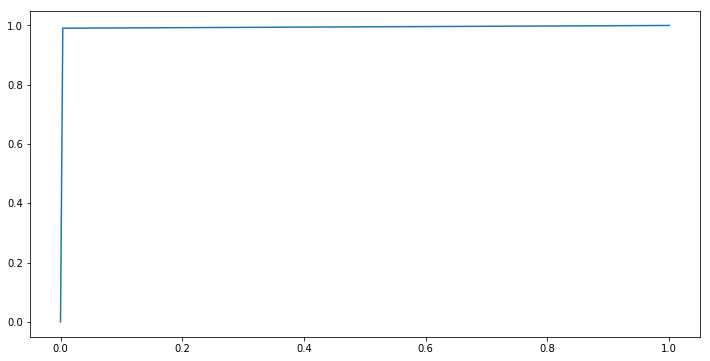

In [26]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(Y_test, predict_labels, pos_label=1)

import matplotlib.pyplot as plt

plt.plot(fpr,tpr)
plt.show() 